# Stage 3

# Dataset Preview

In [48]:
import pandas as pd

# Load dataset
temperature_df = pd.read_csv("update_temperature.csv")

# Convert 'Year' column to numeric in case it's not
temperature_df['Year'] = pd.to_numeric(temperature_df['Year'], errors='coerce')

# Visualization 1 - Global Average Renewable Energy Usage (2000-2025)

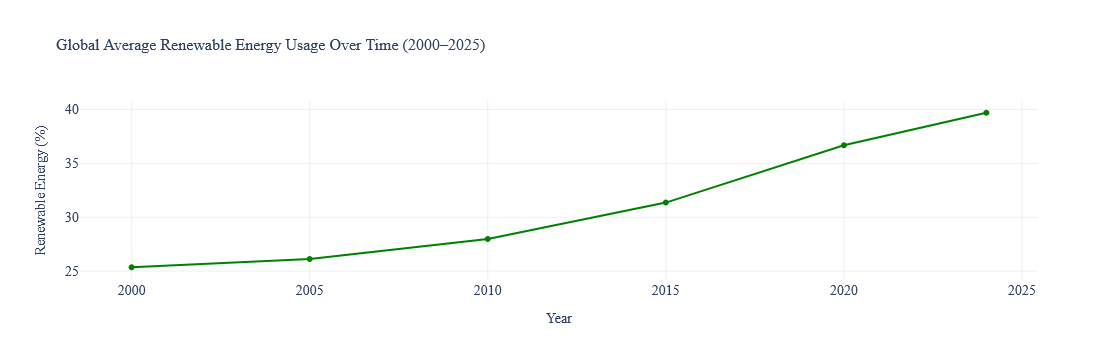

In [18]:
import plotly.express as px

# Calculate renewable energy average of all countries each year
global_renewable_trend = temperature_df.groupby("Year")["Renewable_Energy_pct"].mean().reset_index()

# Create figure
fig = px.line(
    global_renewable_trend,
    x="Year",
    y="Renewable_Energy_pct",
    markers=True,
    title="Global Average Renewable Energy Usage Over Time (2000–2025)",
    labels={"Renewable_Energy_pct": "Renewable Energy (%)"},
    template="plotly_white"
)

# Style settings
fig.update_traces(line=dict(color='green'))
fig.update_layout(
    font=dict(family="Times New Roman", size=14),
    title_font=dict(family="Times New Roman", size=16),
    xaxis_title_font=dict(family="Times New Roman", size=14),
    yaxis_title_font=dict(family="Times New Roman", size=14)
)

# Save as PNG
fig.write_image("global_renewable_trend.png", width=1200, height=600, scale=2)

# Show interactive chart
fig.show()

## Method

To understand how the world has progressed in adopting renewable energy, we focused on the percentage of each country's total energy that comes from renewable sources like wind, solar, and hydroelectric power. Rather than examining individual countries, we looked at the average across all countries for each year from 2000 to 2025. This gives us a high-level view of global progress, smoothing out regional differences and highlighting broader trends.

Once these yearly averages were calculated, we plotted them on a timeline to create a line chart. This chart visually communicates how renewable energy use has changed over time. Each point on the line represents the global average for that year, allowing us to quickly see whether the world is moving toward cleaner energy and how fast.

## Explanation

This chart visualizes the use of renewable energy through by global average percentage. It aggregates data across all countries for each year from 2000 to 2025. Each point on the line represents the average renewable energy contribution to a country’s energy profile for that specific year.

There is a consistent upward trend, indicating global efforts to transition toward cleaner energy sources are gradually succeeding. A rising line indicates increased global adoption of renewables like solar, wind, and hydro power, often driven by climate policies, technological improvements, and public awareness.

- A sharp rise may coincide with international climate agreements
- A flat or declining period may point to stalled policy momentum or increased fossil fuel reliance

Chart helps us:
- Evaluate the effectiveness of past global sustainability efforts.
- Identify inflection points that may correspond with major events or technological breakthroughs.
- Advocate for continued or accelerated investment in renewable energy systems.

# Visualization 2 - Distribution of Renewable Energy Usage by Country

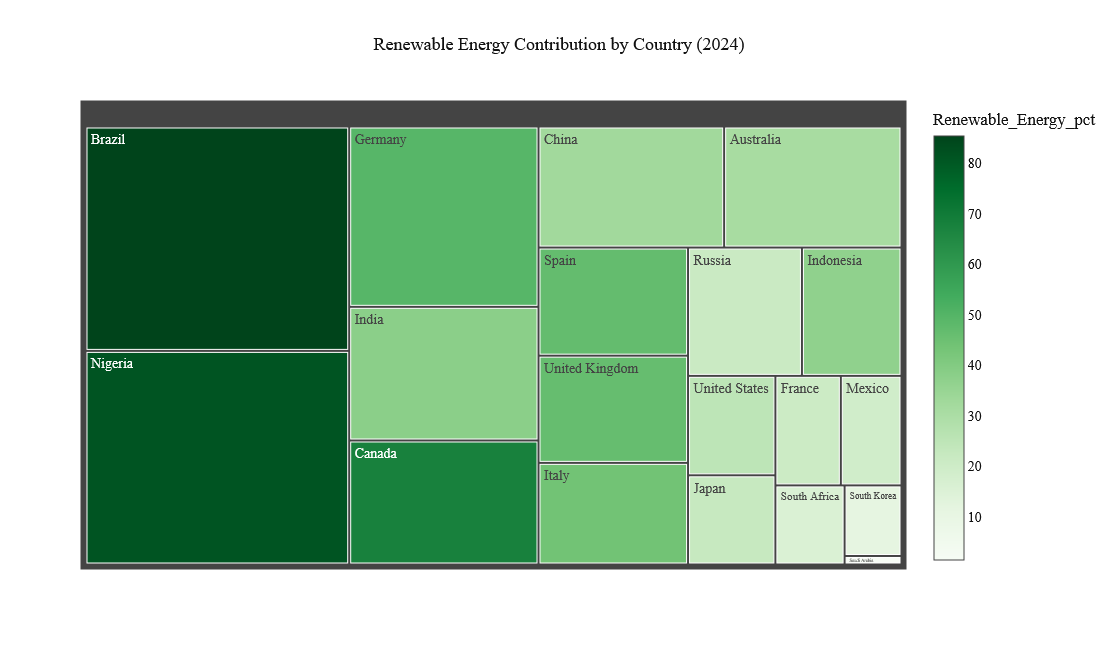

In [24]:
import plotly.express as px

# Ensure the 'Year' column is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Use the most recent year in the dataset
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]

# Create the treemap
fig = px.treemap(
    latest_data,
    path=['Country'],
    values='Renewable_Energy_pct',
    title=f"Renewable Energy Contribution by Country ({int(latest_year)})",
    color='Renewable_Energy_pct',
    color_continuous_scale='Greens'
)

# Adjust layout
fig.update_layout(
    width=1000,
    height=650,
    font=dict(family="Times New Roman", size=14, color="#111111"),
    title_font=dict(family="Times New Roman", size=18, color="#111111")
)

fig.show()

## Method

To understand how different countries are progressing toward clean energy goals, we used a dataset containing annual renewable energy usage statistics for many nations. From this data, we focused on the most recent year available, which offers the latest global snapshot of renewable energy adoption.

We used this data to create a treemap, a visual representation that shows each country as a rectangle. The size of each rectangle corresponds to that country's share of renewable energy usage, and the color intensity reinforces this, with darker greens indicating higher usage of renewables.

This method helps simplify complex, multi-country data into a single visual space. Unlike traditional bar charts or tables, a treemap allows for:

- Quick visual comparison between countries,
- Clear emphasis on leaders and laggards
- A geographical view not influenced by continent or region, but by performance.

We can easily observe which countries are at the forefront of sustainability efforts and which have potential for growth. This helps policymakers, educators, and the public better grasp the global energy landscape at a glance.

## Explanation

This treemap presents how much renewable energy each country contributes based on its share of renewable energy usage (as a percentage of its own total energy use). Each rectangle represents a country, and its size corresponds to how high that percentage is. The greener the shade, the higher the percentage.

- Larger blocks indicate countries with a higher renewable energy percentage.
- Color depth (shades of green) provides a second cue: darker green means greater reliance on renewables.
- Hover labels allow you to interactively inspect each country's exact percentage.

This visualization highlights the global disparity in renewable energy adoption. Countries with abundant hydroelectric, wind, or solar resources as well as strong policy dominate in both size and color intensity.

- Spot leaders in clean energy transition.
- Identify countries with room for improvement.
- Encourage comparison among nations with similar economic profiles.

The visuallization helps:

- Support policy discussions around global energy equity.
- Explore investment or development opportunities in clean energy.
- Present geographic insights in sustainability-focused reports or research.

## Visualization 3 - CO₂ Emissions vs Renewable Share

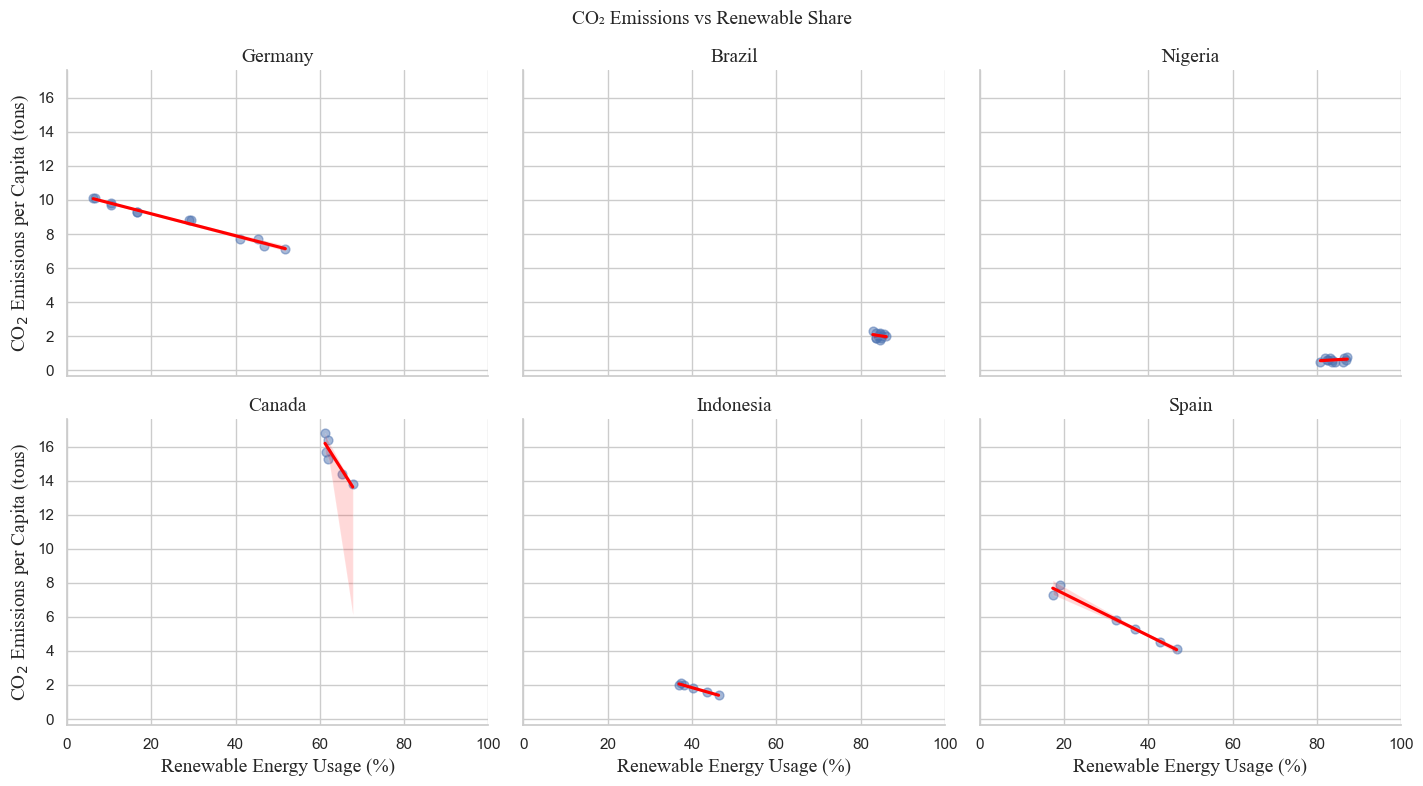

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter Notebooks: ensure inline rendering
%matplotlib inline

# Load the dataset
df = pd.read_csv("update_temperature.csv")

# Convert relevant columns to numeric
df['Renewable_Energy_pct'] = pd.to_numeric(df['Renewable_Energy_pct'], errors='coerce')
df['CO2_Emissions_tons_per_capita'] = pd.to_numeric(df['CO2_Emissions_tons_per_capita'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['Renewable_Energy_pct', 'CO2_Emissions_tons_per_capita'], inplace=True)

# Get top 6 countries by average renewable energy usage
top_countries = (
    df.groupby('Country')['Renewable_Energy_pct']
    .max()
    .nlargest(6)
    .index
)
subset = df[df['Country'].isin(top_countries)]

# Seaborn theme
sns.set_theme(style="whitegrid")

# Create faceted regression plots
g = sns.lmplot(
    data=subset,
    x='Renewable_Energy_pct',
    y='CO2_Emissions_tons_per_capita',
    col='Country',
    col_wrap=3,
    height=4,
    aspect=1.2,
    scatter_kws={'alpha': 0.5, 's': 40},
    line_kws={'color': 'red'}
)

# Labels
g.set_axis_labels("Renewable Energy Usage (%)", r"CO$_2$ Emissions per Capita (tons)", fontname="Times New Roman", fontsize=14)
g.set_titles(col_template="{col_name}", size=14, fontname="Times New Roman")
g.fig.suptitle(
    "CO₂ Emissions vs Renewable Share",
    fontsize=14,
    fontname="Times New Roman"
)

# Standardize x-axis
g.set(xlim=(0, 100))

g.fig.subplots_adjust(top=0.88)
g.savefig("renewable_vs_co2_by_country.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

## Method

We explore the relationship between renewable energy usage and CO₂ emissions per capita in the top 6 countries that lead in renewable energy adoption. This helps evaluate whether higher renewable energy shares are associated with lower carbon emissions at the national level.

Allows us to see whether high renewable energy adoption correlates with decreased CO₂ emissions. Faceting by country reveals whether the relationship is consistent across different national contexts. Regression lines help identify the direction and strength of the relationship (e.g., negative slope suggests higher renewables lead to lower emissions).

This faceted regression plot is designed to visually compare how renewable energy usage impacts CO₂ emissions across different national contexts. It reveals:

Diverse relationships:

- Negative slopes → renewable usage likely contributing to emission reductions
- Flat slopes → minimal impact or data complexity
- Positive slopes (rare) → possible anomalies or opposing forces at play

## Explanation

In many of the countries, the regression lines show a downward trend, suggesting that as renewable energy usage increases, CO₂ emissions per capita tend to decrease. This implies that increased reliance on renewables may indeed be contributing to lower carbon footprints. The steepness of the regression line varies across countries. A steeper negative slope may indicate a stronger dependency of emissions on renewable energy trends, while a flatter line suggests other factors (like industrial activity, fossil fuel exports, or population size) also play significant roles.

Countries with a negative slope suggest that increasing renewable energy usage is associated with lower CO₂ emissions per capita, a sign of effective climate policies. In contrast, countries with a flat or positive slope may show no clear link between renewables and emissions, potentially due to:

- High industrial activity or fossil fuel exports
- Incomplete energy transitions
- Overreliance on non-renewable sources despite renewable growth

Variations in slope direction provide insight into how effective renewable energy strategies are within national contexts.

In certain subplots, the data points appear more dispersed, indicating that while renewables play a role, emissions in those countries may be affected by additional complex variables such as:

- Economic growth
- Energy consumption patterns
- Transportation and industrial emissions
- Policy lag or inconsistency.

The variability among countries reinforces that no single solution fits all, and each nation’s energy-emissions relationship is shaped by its unique economic and environmental context.